# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

Participants: Ke GUO & Rebecca Teklewold

## Import tools

please import others if needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import math

%matplotlib inline

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

Display the set with one color per cluster using the scatter function from matplotlib.pyplot

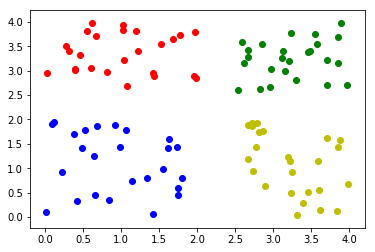

In [2]:
N = 25
x1 = np.random.uniform(0,2,[N,1])
y1 = np.random.uniform(0,2,[N,1])
label0 = np.zeros([N,1])
plt.scatter(x1,y1,c='b',marker='o')

x2 = np.random.uniform(0,2,[N,1])
y2 = np.random.uniform(2.5,4,[N,1])
label1 = 1*np.ones([N,1])
plt.scatter(x2,y2,c='r',marker='o')

x3 = np.random.uniform(2.5,4,[N,1])
y3 = np.random.uniform(0,2,[N,1])
label2 = 2*np.ones([N,1])
plt.scatter(x3,y3,c='y',marker='o')

x4 = np.random.uniform(2.5,4,[N,1])
y4 = np.random.uniform(2.5,4,[N,1])
label3 = 3*np.ones([N,1])
plt.scatter(x4,y4,c='g',marker='o')  # For non overlapping use uniform insetad of normal


data_x = np.concatenate((x1, x2, x3, x4))
data_y = np.concatenate((y1, y2, y3, y4))
data_l = np.concatenate((label0, label1, label2, label3))

data = np.concatenate((data_x, data_y), axis = 1)

model_ref = np.concatenate((data, data_l), axis = 1)

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

In [3]:
def RandomCluster(data, k = 4):
    l = len(data)
    labels = np.random.randint(0,k,(l,1))
    model_R = np.concatenate((data, labels), axis = 1)
    
    return model_R


## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [4]:
# A kind of score
def RI(y_1, y_2):
    l = len(y_1)
    agrees = 0
    for i in range(l-1):
        for j in range(i+1, l):
            y_1_status = int(y_1[i][-1] == y_1[j][-1])
            y_2_status = int(y_2[i][-1] == y_2[j][-1])
            agrees += int(y_1_status == y_2_status)
    return agrees*2/(l*(l-1))

Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [5]:
# Define a fuction to run 100 times
def run100(model1, model2, data, k):
    score = []
    for iter in range(100):
        model = model1(data,k)
        score_ = RI(model, model2)
        score.append(score_)
    mean = np.mean(score)
    std = np.std(score)
    
    return mean,std

In [6]:
score_R = []
for k in range(1,100):
    model_R = RandomCluster(data_x, 4)
    score_k = RI(model_ref, model_R)
    score_R.append(score_k)

Display results and compute the mean and standard deviation.

0.6289643913886338 0.006228043570732953


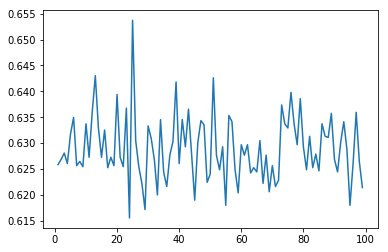

In [7]:
plt.plot(range(1,100),score_R)
m_R = np.mean(score_R)
std_R = np.std(score_R)

print(m_R,std_R)

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [8]:
from scipy.spatial.distance import pdist,squareform
import numpy as np

e_distense = pdist(data)
e_distense = squareform(e_distense)

Display and interpret its shape

(100, 100)

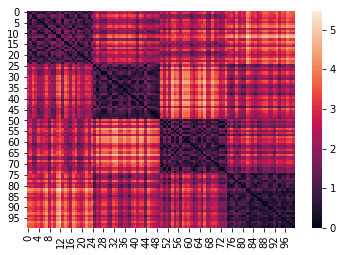

In [9]:
import seaborn as sns

sns.heatmap(e_distense)
e_distense.shape

##### As you can see from the above result, each element aij in the matrix represents the Euclidean distance between its corresponding two points xi and xj, so the elements on the diagonal are all 0. It is obvious that this is a symmetric matrix

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, 'single', metric='euclidean')

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

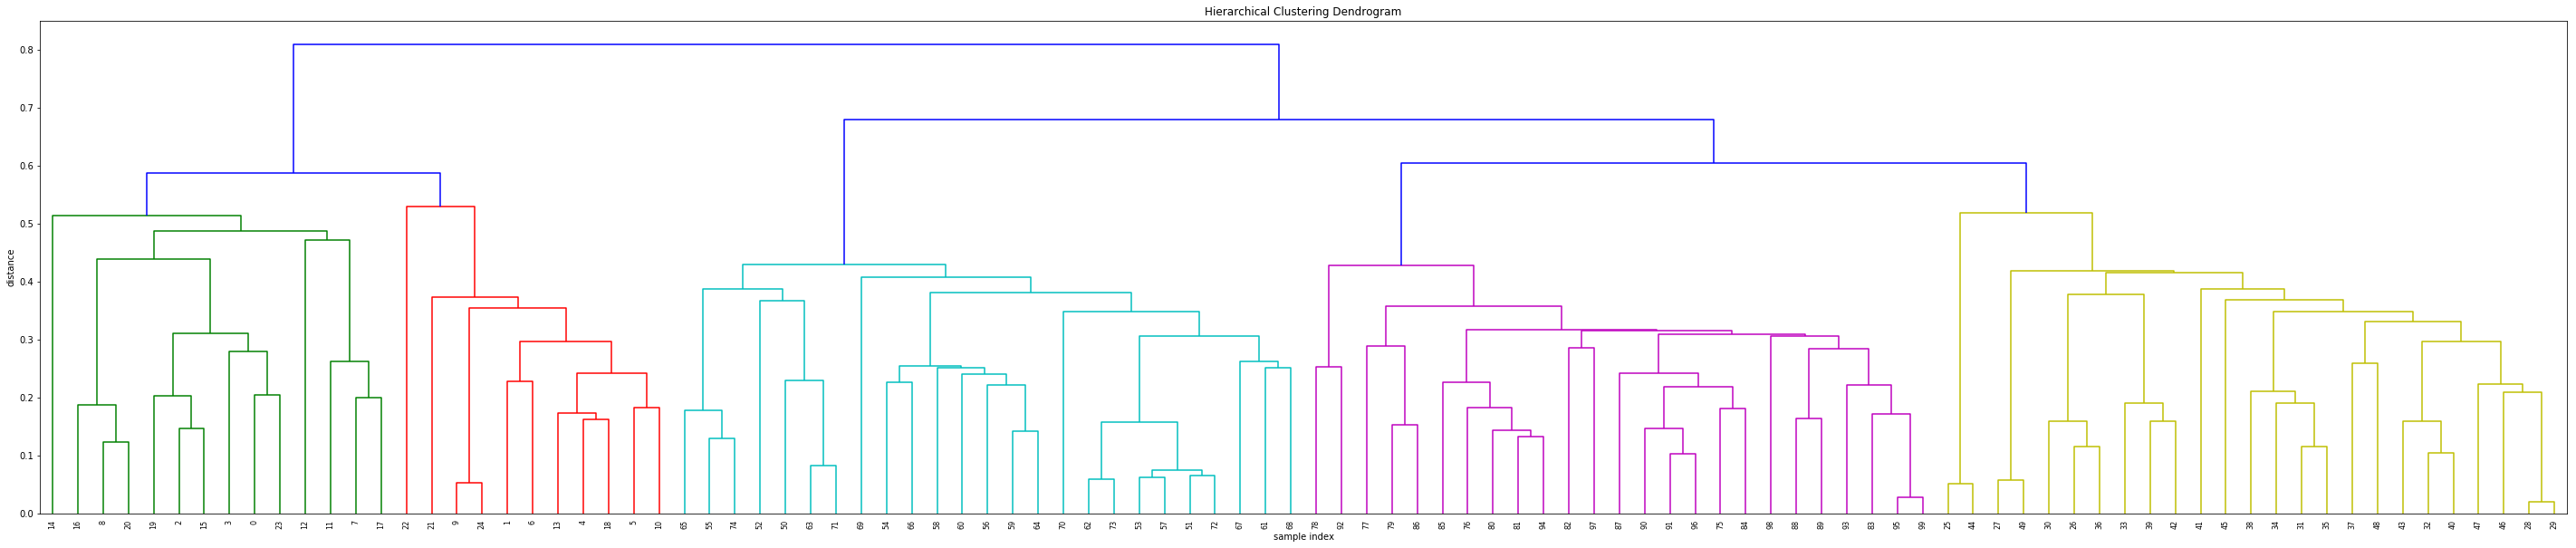

In [11]:
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [12]:
max_d = 0.8 # the max distance
fcluster(Z, 4, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [13]:
def Hierarchical_Clustering(data, k=4):
    Z = linkage(data,'single')
    labels = fcluster(Z, k, criterion='maxclust')
    l = len(labels)
    labels = labels.reshape((l,1))
    model_H = np.concatenate((data, labels), axis = 1)
    return model_H

In [14]:
score_H = []
for k in range(1,100):
    model_H = Hierarchical_Clustering(data)
    score_k = RI(model_ref, model_H)
    score_H.append(score_k)

Display results and compute the mean and standard deviation.

1.0 0.0


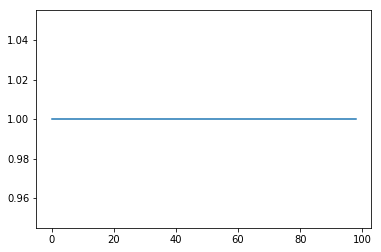

In [15]:
plt.plot(score_H)
m_H = np.mean(score_H)
std_H = np.std(score_H)

print(m_H, std_H)

Explain why the standard deviation is 0.

##### Because this is a determined algorithm and not a random algorithm as the above one. It will not change the result with the number of iterations.

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
kcl = KMeans(n_clusters=4)
kcl.fit(data)
labels = kcl.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
import pandas as pd
import random
def K_Means(data, k=4):
    # centers = np.random.random((k,1,1)) choose the data point might be better
    l = len(data)
    #random_index = np.random.randint(0, l, size=k) # Have problem here, sometimes create same index
    # the above function can be replaced by np.random.choice(l,k,replace=False)
    centers = random.sample(list(data), k)
    precise = 0.001
    max = 100
    oldcenters = centers
    # oldlabels = np.zeros(l)
    for i in range(max):
        e_distense = cdist(data,oldcenters,metric='sqeuclidean')
        labels = np.argmin(e_distense, axis = 1)
        newcenters = pd.DataFrame(data).groupby(labels).mean()
        newcenters = newcenters.values
        error = np.sum(abs(newcenters - oldcenters))
        if(error <= precise):
            break
        #if(labels.all() == oldlabels.all()):
            #break
        oldcenters = newcenters
        # oldlabels = labels
    labels = labels.reshape((l,1))
    model_K = np.concatenate((data, labels), axis = 1)
    return model_K
        
# Use errors sometimes may cant work with this command: operands could not be broadcast together with shapes (3,2) (4,2).
# So I plan to compare with label but the performance is not so good.
    

Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [18]:
score_K = []
for k in range(1,100):
    model_K = K_Means(data)
    score_k = RI(model_ref, model_K)
    score_K.append(score_k)


Display results and compute the mean and standard deviation.

0.9918824609733701 0.039714650911523916


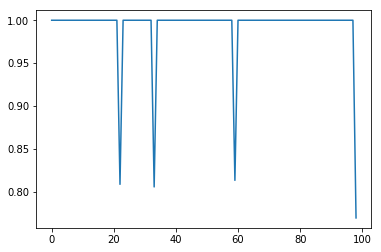

In [19]:
plt.plot(score_K)
m_K = np.mean(score_K)
std_K = np.std(score_K)

print(m_K, std_K)

## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

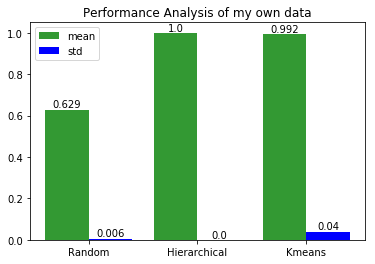

In [20]:
label_list = ['Random', 'Hierarchical', 'Kmeans']

num_list1 = [m_R, m_H, m_K]
num_list2 = [std_R, std_H, std_K]

def plot_bar(label_list, num_list1, num_list2, string=''):
    x = range(len(num_list1))

    rects1 = plt.bar(x, height=num_list1, width=0.4, alpha=0.8, color='green', label="mean")
    rects2 = plt.bar([i + 0.4 for i in x], height=num_list2, width=0.4, color='blue', label="std")

    plt.xticks([index + 0.2 for index in x], label_list)
    plt.title('Performance Analysis'+ ' ' + string)
    plt.legend()
    
    for rect in rects1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 3)), ha="center", va="bottom")
    for rect in rects2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 3)), ha="center", va="bottom")
    
plot_bar(label_list, num_list1, num_list2, string='of my own data')

Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

In [21]:
from sklearn.datasets import load_iris
iris_data = load_iris()['data']
iris_label = load_iris()['target'].reshape(len(iris_data), 1)

#model_iris = np.concatenate((iris_data, iris_label), axis = 1)

k = len(np.unique(iris_label))


iris_model_R = RandomCluster(iris_data, k)
iris_model_H = Hierarchical_Clustering(iris_data, k)
iris_model_K = K_Means(iris_data, k)

mean_iris_R, std_iris_R = run100(RandomCluster, iris_label, iris_data, k)
mean_iris_H, std_iris_H = run100(Hierarchical_Clustering, iris_label, iris_data, k)
mean_iris_K, std_iris_K = run100(K_Means, iris_label, iris_data, k)


mean_iris_list = [mean_iris_R, mean_iris_H, mean_iris_K]
std_iris_list = [std_iris_R, std_iris_H, std_iris_K]

plot_bar(label_list, mean_iris_list, std_iris_list, string='of the iris data set')

ValueError: operands could not be broadcast together with shapes (2,4) (3,4) 

Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()['data']
bc_label = load_breast_cancer()['target'].reshape((len(bc_data), 1))

k = len(np.unique(bc_label))

bc_model_R = RandomCluster(bc_data, k)
bc_model_H = Hierarchical_Clustering(bc_data, k)
bc_model_K = K_Means(bc_data, k)

mean_bc_R,std_bc_R = run100(RandomCluster, bc_data, bc_label, k)
mean_bc_H,std_bc_H = run100(Hierarchical_Clustering, bc_data, bc_label, k)
mean_bc_K,std_bc_K = run100(K_Means, bc_data, bc_label, k)

mean_bc_list = [mean_bc_R, mean_bc_H, mean_bc_K]
std_bc_list = [std_bc_R, std_bc_H, std_bc_K]
plot_bar(label_list, mean_bc_list, std_bc_list, string='of the breast cancer data set')

In [ ]:
# Well for the Kmeans the performance of the created function is not so good. We try to use the builtin function Kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()['data']
bc_label = load_breast_cancer()['target'].reshape((len(bc_data), 1))

k = len(np.unique(bc_label))

bc_model_R = RandomCluster(bc_data, k)
bc_model_H = Hierarchical_Clustering(bc_data, k)



mean_bc_R,std_bc_R = run100(RandomCluster, bc_data, bc_label, k)
mean_bc_H,std_bc_H = run100(Hierarchical_Clustering, bc_data, bc_label, k)

score_bc_K = []
for i in range(1,100):
    kcl = KMeans(n_clusters=k)
    kcl.fit(bc_data)
    labels = kcl.labels_.reshape((len(kcl.labels_), 1))
    score_k = RI(model_ref, labels)
    score_K.append(score_k)
mean_bc_K = np.mean(score_bc_K)
std_bc_K = np.std(score_bc_K)

print(mean_bc_K, std_bc_K)
mean_bc_list = [mean_bc_R, mean_bc_H, mean_bc_K]
std_bc_list = [std_bc_R, std_bc_H, std_bc_K]
plot_bar(label_list, mean_bc_list, std_bc_list, string='of the breast cancer data set')



## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


$Gk(X) = \frac{Dk(X)}{DK(null)}$ and $ Dk(X)$ is the average intra class distance

In [ ]:
import pandas as pd
import random
def K_Means_return_centers(data, k=4):
    # centers = np.random.random((k,1,1)) choose the data point might be better
    l = len(data)
    #random_index = np.random.randint(0, l, size=k) # Have problem here, sometimes create same index
    # the above function can be replaced by np.random.choice(l,k,replace=False)
    centers = random.sample(list(data), k)
    precise = 0.001
    max = 100
    oldcenters = centers
    oldlabels = np.zeros(l)
    for i in range(max):
        e_distense = cdist(data,oldcenters,metric='euclidean')
        labels = np.argmin(e_distense, axis = 1)
        newcenters = pd.DataFrame(data).groupby(labels).mean()
        newcenters = newcenters.values
        error = np.sum(abs(newcenters - oldcenters))
        if(error <= precise):
            break
        #if(labels.all() == oldlabels.all()):
            #break
        oldcenters = newcenters
        oldlabels = labels
    labels = labels.reshape((l,1))
    model_K = np.concatenate((data, labels), axis = 1)
    return model_K, newcenters
        
# Use errors sometimes may cant work with this command: operands could not be broadcast together with shapes (3,2) (4,2).
# So I plan to compare with label but the performance is not so good.
    

In [ ]:
def calculate_Dk(centers, data):
    for i in range(len(centers)):
        data[-1][i]

In [ ]:
x = pd.DataFrame(data).groupby(labels)
list(x)

In [ ]:
# In this secton, we use KMeans method to choose the best K for different datasets
DK_null = sum(sum(cdist(data, data, metric='euclidean')))
print(DK_null)
Gk = []
for k in range(1,10):
    model, centers = K_Means_return_centers(data, k)
    Dk_ = sum(sum(cdist(centers, data, metric='euclidean')))
    print(Dk_)
    Gk_ = Dk_/DK_null
    Gk.append(Gk_)
# print(Gk)
plt.plot(range(1,10), Gk)

Discuss the results.

answer here.